# Homework 3

Run the cell below to import the libraries you might need for this homework. Add any libraries you think you will need, then use methods from class to answer the following questions.

In [1]:
import numpy as np
from datascience import *

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')


## 1. Birth Rates


The following table gives census-based population estimates for each state on July 1, 2015 and July 1, 2016. The last four columns describe the components of the estimated change in population during this time interval. *For all questions below, assume that the word "states" refers to all 52 rows including Puerto Rico & the District of Columbia.* Run the cell below to get the table in the correct format, upon which this problem is based.

In [2]:
# Don't change this cell; just run it.
# From http://www2.census.gov/programs-surveys/popest/datasets/2010-2016/national/totals/nst-est2016-alldata.csv
# See http://www2.census.gov/programs-surveys/popest/datasets/2010-2015/national/totals/nst-est2015-alldata.pdf
#     for column descriptions. (As of Feb 2017, no descriptions were posted for 2010-2016.)
pop = Table.read_table('nst-est2016-alldata.csv').where('SUMLEV', 40).select([1, 4, 12, 13, 27, 34, 62, 69])
pop = pop.relabeled(2, '2015').relabeled(3, '2016')
pop = pop.relabeled(4, 'BIRTHS').relabeled(5, 'DEATHS')
pop = pop.relabeled(6, 'MIGRATION').relabeled(7, 'OTHER')
pop.set_format([2, 3, 4, 5, 6, 7], NumberFormatter(decimals=0)).show(5)

REGION,NAME,2015,2016,BIRTHS,DEATHS,MIGRATION,OTHER
3,Alabama,"4,853,875","4,863,300","58,556","52,405","3,874",-600
4,Alaska,"737,709","741,894","11,255","4,511","-2,557",-2
4,Arizona,"6,817,565","6,931,071","87,204","56,564","76,405","6,461"
3,Arkansas,"2,977,853","2,988,248","37,936","30,581","3,530",-490
4,California,"38,993,940","39,250,017","502,848","273,850","33,530","-6,451"


**Question 1 (3 points).** The annual birth rate for a year-long period is the number of births in that period as a proportion of the population at the start of the period. Which state had the least birth rate?

In [3]:
Q1=pop.with_columns("BIRTHRATE", 
                        pop.column('BIRTHS')/pop.column('2015'))
Q1=Q1.sort('BIRTHRATE').show(1)

REGION,NAME,2015,2016,BIRTHS,DEATHS,MIGRATION,OTHER,BIRTHRATE
X,Puerto Rico,"3,473,181","3,411,307","30,991","28,108","-64,757",0,0.00892294


In [4]:
print('Puerto Rico had the least birth rate.')

Puerto Rico had the least birth rate.


**Question 2 (5 points).** Give a table that holds information about the states that had more deaths than births.
*Hint: This question requires a method that we used in class. However, this method should be used differently. Remember that to learn about any method and its possible arguments, you may type the method name followed by a "?" as shown below. Think of the method that you want to use first, then read about it.*

In [5]:
Q2=pop.with_columns("deaths-births", 
                        pop.column('DEATHS')-pop.column('BIRTHS'))
Q2=Q2.where('deaths-births',are.above(0))
Q2.show()

REGION,NAME,2015,2016,BIRTHS,DEATHS,MIGRATION,OTHER,deaths-births
1,Maine,"1,329,453","1,331,479","12,542","13,842","3,954",-628,1300
3,West Virginia,"1,841,053","1,831,102","19,799","22,479","-6,583",-688,2680


**Question 3 (4 points).** The annual rate of migration for a year-long period is the net number of migrations (in and out) as a proportion of the population at the start of the period. The `MIGRATION` column contains estimated annual net migration counts by state. Write a function called `displayHighestMovers`, which takes a table as input and returns as output an array holding the names of states with annual rate of migration was higher than 1%. The array should display the name of these states in the order of their corresponding annual rate of migration from highest to lowest.

In [6]:
def displayHighestMovers(x):
    migrationrate=x.column('MIGRATION')/x.column('2015')
    Q3=x.with_column('MIGRATIONRATE',migrationrate).where('MIGRATIONRATE',are.above(0.01)).sort('MIGRATIONRATE',descending=True)
    Q3=Q3.column('NAME')
    return Q3
displayHighestMovers(pop)


array(['Florida', 'Nevada', 'Oregon', 'Washington', 'Idaho', 'Arizona',
       'Colorado', 'South Carolina'], dtype='<U20')

**Question 4 (2 points).** Construct a table that gives the total number of births in each region.

In [7]:
pop.select('REGION','BIRTHS').group('REGION', sum)


REGION,BIRTHS sum
1,629063
2,828188
3,1540837
4,979657
X,30991


**Question 5 (2 points).** How many states had a total population in 2016 that was smaller than the total number of babies born in region 4?

In [8]:
print('AS we can see from Question4, the totoal number of babies born in region 4 is 979657')
Q3=pop.where('2016',are.below(979657))
Q3.show()
print('7 states had a total population in 2016 that was smaller than the total number of babies born in region 4')

AS we can see from Question4, the totoal number of babies born in region 4 is 979657


REGION,NAME,2015,2016,BIRTHS,DEATHS,MIGRATION,OTHER
4,Alaska,"737,709","741,894","11,255","4,511","-2,557",-2
3,Delaware,"944,076","952,065","10,922","8,945","5,583",429
3,District of Columbia,"670,377","681,170","9,779","5,455","6,392",77
2,North Dakota,"756,835","757,952","11,824","6,172","-4,684",149
2,South Dakota,"857,919","865,454","12,114","7,296","2,573",144
1,Vermont,"626,088","624,594","6,035","5,547","-1,910",-72
4,Wyoming,"586,555","585,501","7,590","4,838","-3,823",17


7 states had a total population in 2016 that was smaller than the total number of babies born in region 4


**Question 6 (4 points).** 
1. Was there an association between birth rate and death rate during this time interval? Support your conclusion with a chart. Hint: set `fit_line=True` for your plot to aid visualiation.
2. If an association exists, what might explain it? 

(0.003, 0.015)

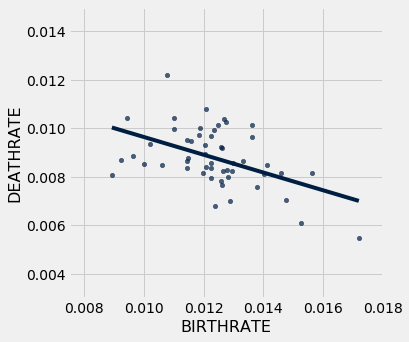

In [9]:
Q6=pop.with_columns("BIRTHRATE", 
                        pop.column('BIRTHS')/pop.column('2015'),'DEATHRATE', pop.column('DEATHS')/pop.column('2015'))
Q6.scatter('BIRTHRATE','DEATHRATE',fit_line=True)
plots.xlim(0.0075,0.018)
plots.ylim(0.003,0.015)


In [10]:
print('The association exists. The birthrate and deathrate are inversely proportional in all. The deathrate decreased when the birthrate increased. The association matches the aging society theory. The state with low birthdate tends to have high deathrate. ')

The association exists. The birthrate and deathrate are inversely proportional in all. The deathrate decreased when the birthrate increased. The association matches the aging society theory. The state with low birthdate tends to have high deathrate. 


## 2. Consumer Financial Protection Bureau Complaints


The Consumer Financial Protection Bureau has collected and published consumer complaints against financial companies since 2011.  These financial companies offer a variety of products.

**Question 1 (2 points).** Read in the data `cc_2016_fina.csv` and make sure the complaints are from 2016 only. How many complaints are in the dataset?

In [11]:
Q21 = Table.read_table('cc_2016_final.csv')

In [12]:
Q21.num_rows

32334

In [13]:
Q21.show(1)

Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
12/31/16,Debt collection,Medical,Improper contact or sharing of info,Talked to a third party about my debt,nan,Company believes it acted appropriately as authorized by ...,AmeriCollect,FL,32068,nan,Consent not provided,Web,12/31/16,Closed with explanation,Yes,No,2.27057e+06


**Question 2 (5 points).** Draw a sorted bar chart that shows the number of complaints per product in descending order.

In [14]:
Q2 = Q21.group('Product').sort('count',descending=True)
Q2.show(14)

Product,count
Credit reporting,8240
Debt collection,6789
Credit card,6698
Bank account or service,3337
Consumer Loan,3054
Student loan,1639
Mortgage,1332
Money transfers,475
Prepaid card,333
Payday loan,289


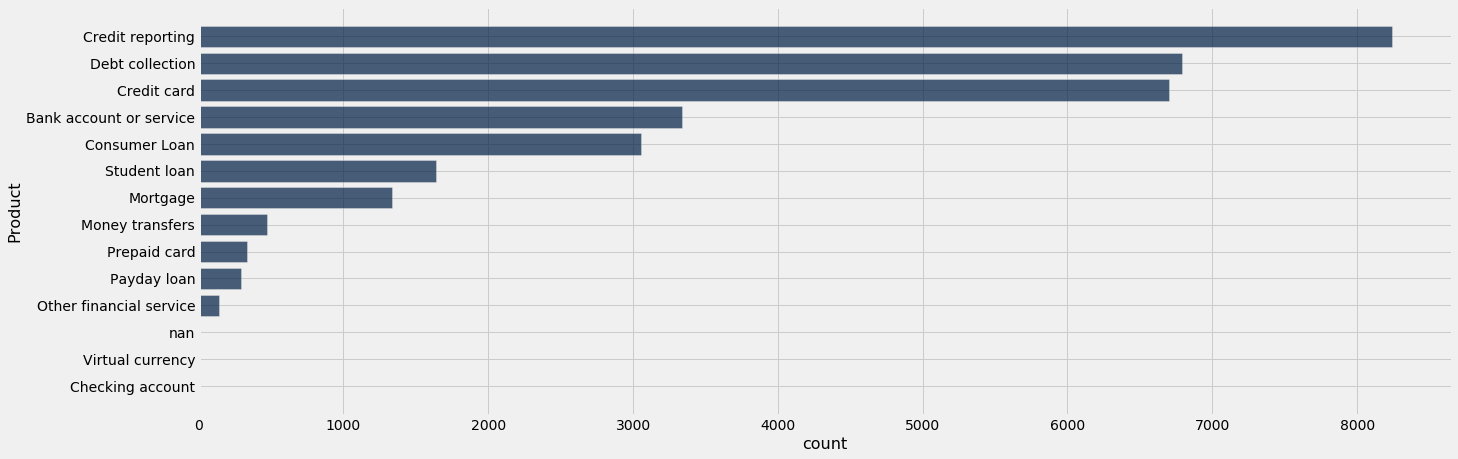

In [15]:
Q2.barh('Product','count',width =20)

**Question 3 (4 points).** Construct a table that summarizes the number of complaints per company and decide whether it's a good idea to draw a bar chart of that data. Explain your answer.

In [16]:
Q3 = Q21.group('Company').sort('count',descending=True)
Q3

Company,count
Experian Information Solutions Inc.,7859
JPMORGAN CHASE & CO.,2450
WELLS FARGO & COMPANY,2198
CAPITAL ONE FINANCIAL CORPORATION,1781
SYNCHRONY FINANCIAL,1323
AMERICAN EXPRESS COMPANY,978
DISCOVER BANK,673
U.S. BANCORP,659
PORTFOLIO RECOVERY ASSOCIATES INC,653
ENCORE CAPITAL GROUP INC.,625


In [17]:
print("It's not a good idea to draw a bar chart. Because there are 868 rows that means that we need to have 868 bars.Too much for us to have a good understanding of the data.")

It's not a good idea to draw a bar chart. Because there are 868 rows that means that we need to have 868 bars.Too much for us to have a good understanding of the data.


**Question 4 (4 points).** We denote ${rf}_c$ as the [relative frequency](https://www.mathsisfun.com/data/relative-frequency.html) of complaints made for company c. Draw a bar chart of the 10 companies with highest ${rf}_c$.

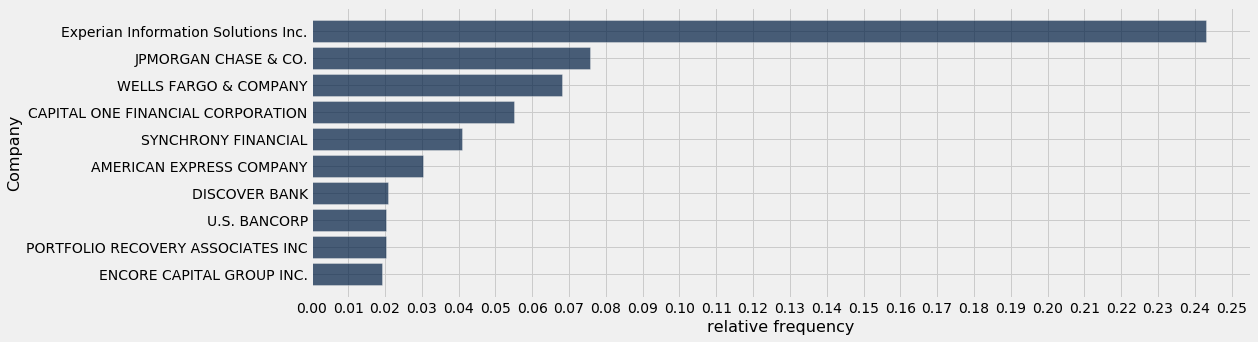

In [18]:
Q4=Q3.take(np.arange(10))
Q4=Q4.with_columns('relative frequency',Q4.column('count')/32334)
Q4.barh('Company','relative frequency',width=15)
my_x_ticks = np.arange(0, 0.26, 0.01)
a=plots.xticks(my_x_ticks)


**Note:** Graphs aren't very useful without accurate labels.  Make sure that the text on the horizontal axis of the graph makes sense.

## 3. Text Analysis (15 points)


Go to the website gutenberg.org (as done in lecture).
1. Choose a book or books to download (other than the ones already dicussed) and parse it the way you like.
2. Formulate an interesting question about your book(s). You could be exploring a certain aspect of one book or comparing a certain aspect across different books. 
3. Analyze the data to answer your question.
4. If applicable, mention one thing about the data, that if collected, would have helped you do better analysis.

Be sure to generate at least one chart or graph that helps you answer your question.

**Note:** This question is opened ended. There is no one right or wrong answer. 
    It mimics what happens in real life with data science. You often get 
    dry data and need to see what you can interpret out of the provided data,
    then possibly suggest what kind of extra data you wish to collect to make more useful comments.   Remember that you are doing science, and try to come up with a question that is both interesting, and requires a non-trivial amount of work to answer.
    

In [19]:
from datascience.predicates import are
import matplotlib  #plotting library
matplotlib.use('Agg', warn=False)   #this defines the backend
from urllib.request import urlopen #library for reading urls
import re   #this allows us to operate on regular expressions
             # to learn about regular expressions, look at the unix
            # command grep
        
#def read_url(url): 
#    return re.sub('\\s+', ' ', urlopen(url).read().decode()

In [20]:
#1 part
robinson_url = 'http://www.gutenberg.org/files/521/521-0.txt'
robinson_chapters = re.sub('\\s+', ' ', urlopen(robinson_url).read().decode()).split('CHAPTER ')[1:]
robinson_data = Table().with_columns('The Life and Advantures of Robinson Crusoe', robinson_chapters)
robinson_data.show()

The Life and Advantures of Robinson Crusoe
"I—START IN LIFE I was born in the year 1632, in the city ..."
II—SLAVERY AND ESCAPE That evil influence which carried ...
"III—WRECKED ON A DESERT ISLAND After this stop, we made ..."
IV—FIRST WEEKS ON THE ISLAND When I waked it was broad d ...
"V—BUILDS A HOUSE—THE JOURNAL September 30, 1659.—I, poor ..."
VI—ILL AND CONSCIENCE-STRICKEN When I came down to the s ...
VII—AGRICULTURAL EXPERIENCE I had now been in this unhap ...
VIII—SURVEYS HIS POSITION I mentioned before that I had ...
"IX—A BOAT But first I was to prepare more land, for I ha ..."
"X—TAMES GOATS I cannot say that after this, for five yea ..."


In [21]:
#2 part
print("question: As I was tring to read the book and found it always talks about Friday. I did't understand the word's meaning here. So I want to \nfind the beginning of the story about the word. This question might be defined as tring to find what is the first palce when a word appears and it's special meaning." )

question: As I was tring to read the book and found it always talks about Friday. I did't understand the word's meaning here. So I want to 
find the beginning of the story about the word. This question might be defined as tring to find what is the first palce when a word appears and it's special meaning.


In [22]:
#3
robinson_data.num_rows

20

In [23]:
appearances = Table().with_columns(
    'Chapter', np.arange(1,21,1),
    'Friday', np.char.count(robinson_data.column(0), 'Friday')
    )

appearances.show()

Chapter,Friday
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0
10,0


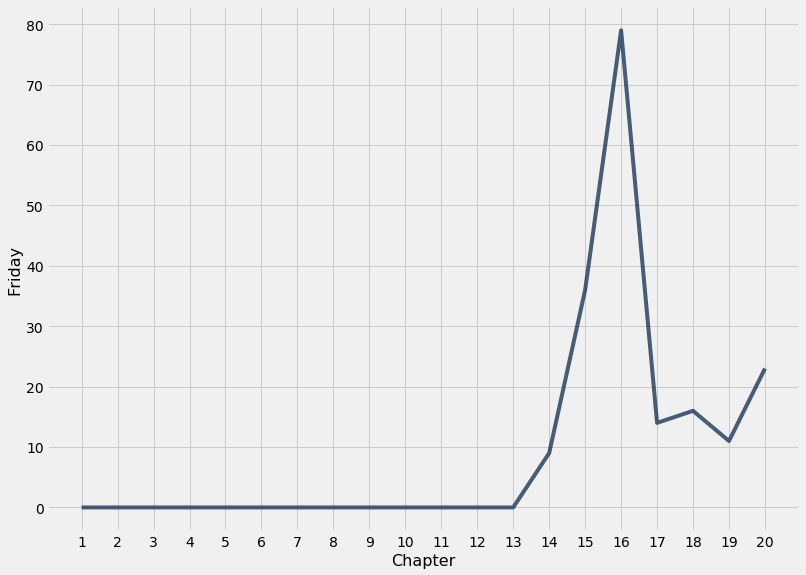

In [24]:
appearances.plot(0,width =12, height =9)
my_x_ticks=(np.arange(1,21,1))
a=plots.xticks(my_x_ticks)

In [25]:
print('The data makes me understand that something according Friday happens after chapter 14, I can jump to chapter 14 to find the answer. The word Friday is often used as a day. It might be mentioned because Chapter 14 is on Friday. We can see chapter 15 has a huge increase so maybe it is the chapter. ')

The data makes me understand that something according Friday happens after chapter 14, I can jump to chapter 14 to find the answer. The word Friday is often used as a day. It might be mentioned because Chapter 14 is on Friday. We can see chapter 15 has a huge increase so maybe it is the chapter. 


In [26]:
#4
print('The chapter 16 has the most "Friday" and it might be interesting to analysis it as well. we can find the most common words on this chapter.')

The chapter 16 has the most "Friday" and it might be interesting to analysis it as well. we can find the most common words on this chapter.


In [27]:
letter=robinson_data.column(0).item(15).split()
chapter1=Table().with_columns('Letter',letter)
chapter1=chapter1.group('Letter').sort('count',descending=True)#.where('count',are.between(2,20))
chapter1.show(20)

Letter,count
the,316
and,309
I,268
to,247
of,169
he,129
a,128
was,110
as,102
that,97


In [28]:
print('better analysis: It is interesting that the word Friday count 53 not 79. The reason might be that Friday might show with quotation marks or show as "Fridays" and so on. It might help analysis the data if knows the common format of a word. ')

better analysis: It is interesting that the word Friday count 53 not 79. The reason might be that Friday might show with quotation marks or show as "Fridays" and so on. It might help analysis the data if knows the common format of a word. 


In [29]:
print("Another interesting thing is that, no usual name is on the list. A lot of 'he', 'him', 'his', 'my' means that it is possible to be a first \n  person novel." )

Another interesting thing is that, no usual name is on the list. A lot of 'he', 'him', 'his', 'my' means that it is possible to be a first 
  person novel.
